In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load the dataset
df = pd.read_csv('/kaggle/input/california-university-fields-of-study-distributi/Courses_Berkeley_2018-01-15.csv')

# Display the first few rows of the dataset
print(df.head())


   index  Year              Field  \
0      0  1967  Aerospace Studies   
1      1  2011      Public Health   
2      2  2011      Public Health   
3      3  2011      Public Health   
4      4  1971  Aerospace Studies   

                                                Name Number  \
0                   Officer Basic Military Training      22   
1                         Drugs, Health, and Society    103   
2  Policy, Planning , and Evaluation of Health Pr...    105   
3  Cognitive Science C1 Molecularand Cell Biology...     1B   
4                Officer Advanced Military Training     432   

                       Area       GenArea  \
0  Aeronautical Engineering   Engineering   
1           Health Sciences  Professional   
2           Health Sciences  Professional   
3           Health Sciences  Professional   
4  Aeronautical Engineering   Engineering   

                                         Description  Profs1  Profs2   Fall  \
0   (6) Study of world military systems and basi

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305670 entries, 0 to 305669
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        305670 non-null  int64  
 1   Year         305670 non-null  int64  
 2   Field        305670 non-null  object 
 3   Name         305670 non-null  object 
 4   Number       305669 non-null  object 
 5   Area         305670 non-null  object 
 6   GenArea      305670 non-null  object 
 7   Description  295025 non-null  object 
 8   Profs1       160543 non-null  float64
 9   Profs2       25857 non-null   float64
 10  Fall         305670 non-null  bool   
 11  Winter       305670 non-null  bool   
 12  Spring       305670 non-null  bool   
 13  Summer       305670 non-null  bool   
 14  Taught       305670 non-null  bool   
dtypes: bool(5), float64(2), int64(2), object(6)
memory usage: 24.8+ MB


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values in each column
print(missing_values)


index               0
Year                0
Field               0
Name                0
Number              1
Area                0
GenArea             0
Description     10645
Profs1         145127
Profs2         279813
Fall                0
Winter              0
Spring              0
Summer              0
Taught              0
dtype: int64


In [4]:
# Display unique values in the 'Year' column
unique_years = df['Year'].unique()

# Display the count of records for each unique year
year_counts = df['Year'].value_counts()

print(unique_years)
print(year_counts)


[1967 2011 1971 1977 1978 1992 1988 1993 1994 1995 1974 1999 1975 1979
 2001 1980 1981 2003 1983 1986 2005 1987 2007 2009 1989 1990 1991 1976
 1997 1984 1985 1917 1918 1920 1924 1925 1926 1927 1931 1932 1936 1939
 1940 1941 1944 1945 1946 1953 1954 1955 1956 1957 1958 1961 1963 1964
 1965 1966 1968 1969 1928 1951 1952 1970 1962 1973 1911 1947 1912 1914
 1950 1915 1916 1919 1921 1922 1929 1930 1933 1934 1935 1938 1937 1900
 1901 1902 1904 1906 1908 1909 1943 1910 1913 1942 1948 1923 1903 1949]
Year
2011    7305
1994    6927
1991    6882
2009    6877
1995    6702
        ... 
1903     638
1901     610
1904     598
1909     585
1900     528
Name: count, Length: 98, dtype: int64


**Can we visualize the distribution of courses over the years?**

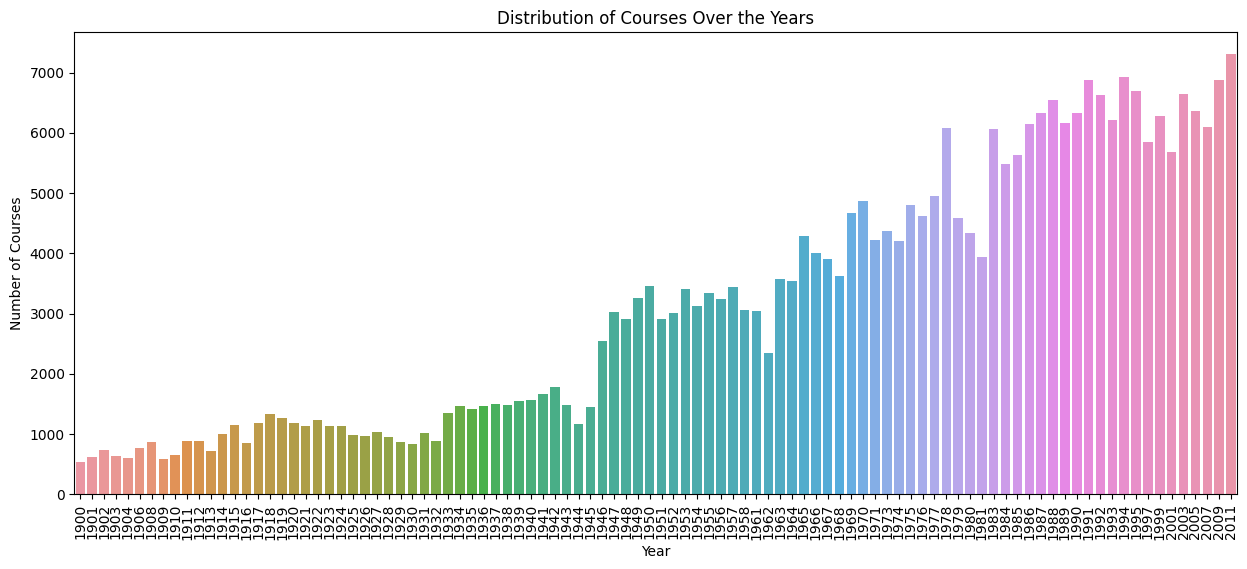

In [5]:
# Plot the distribution of courses over the years
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', data=df)
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses Over the Years')
plt.show()


**What is the distribution of courses in each academic area?**

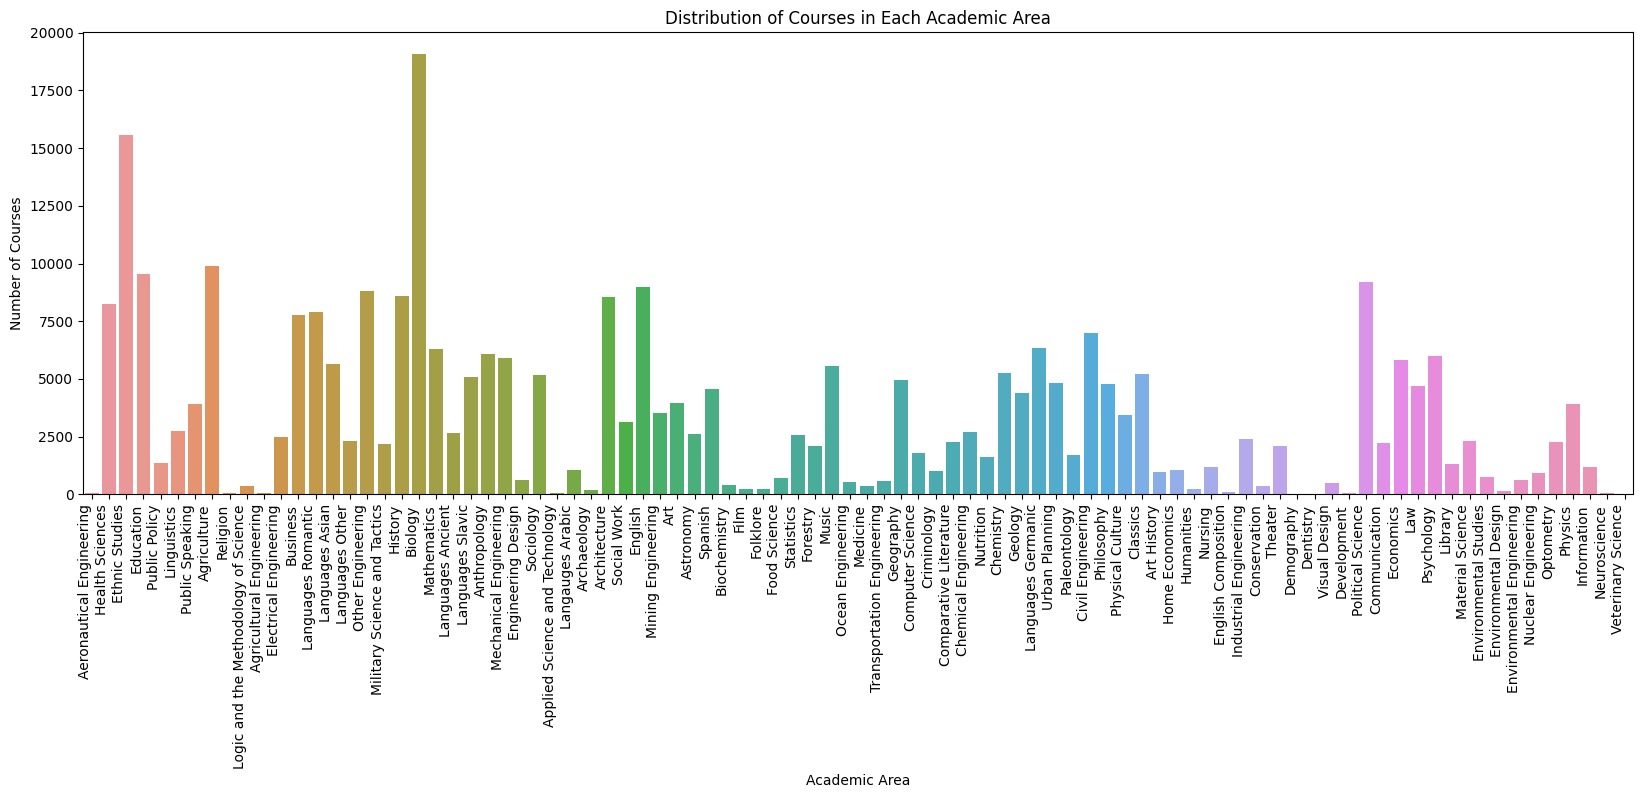

In [6]:
# Plot the distribution of courses in each academic area
plt.figure(figsize=(20, 6))
sns.countplot(x='Area', data=df)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Academic Area')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses in Each Academic Area')
plt.show()


**How many courses are taught each term (Fall, Winter, Spring, Summer) for each year?**

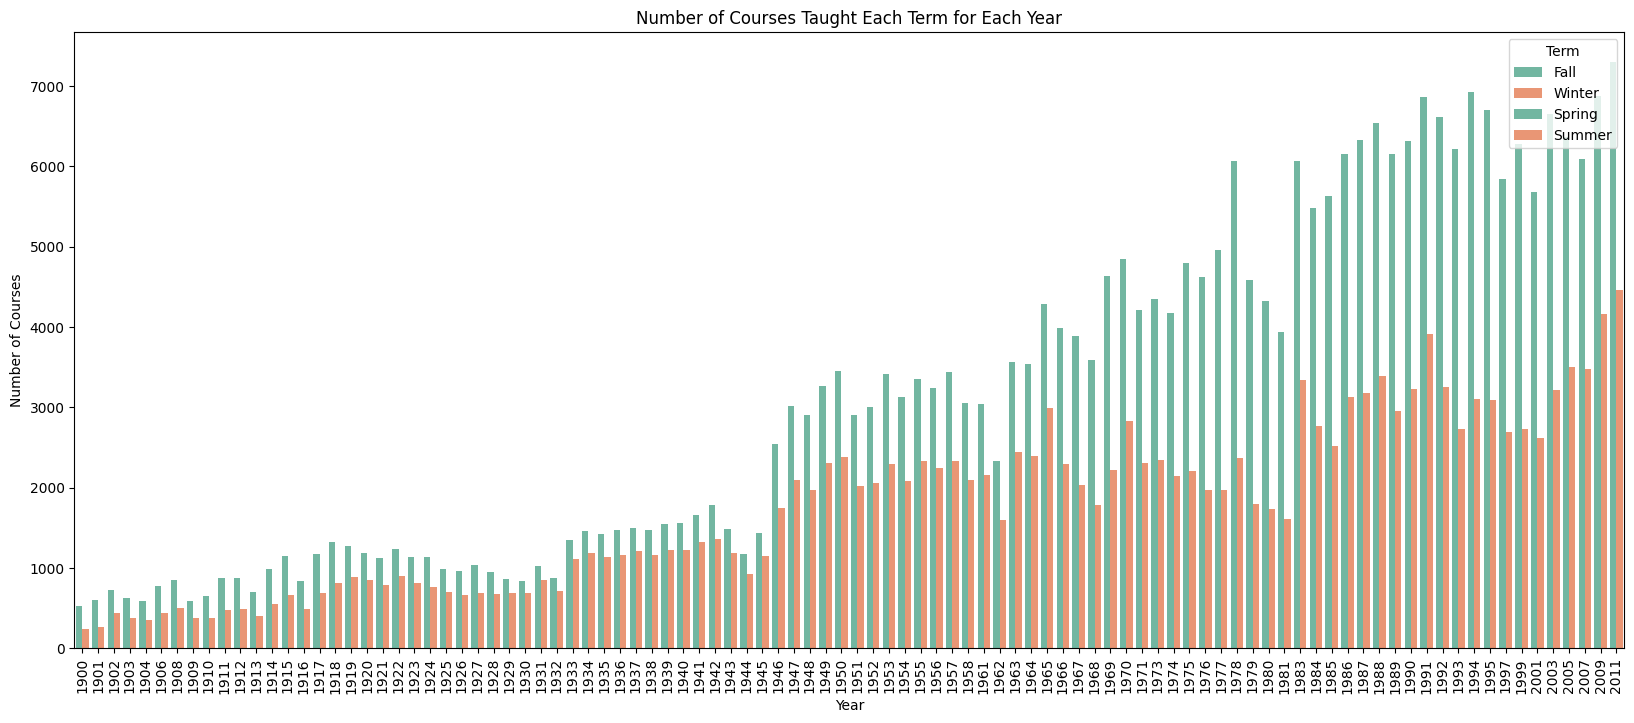

In [7]:
# Create a bar plot for the number of courses taught each term for each year
plt.figure(figsize=(20, 8))
sns.countplot(x='Year', hue='Fall', data=df, palette='Set2')
sns.countplot(x='Year', hue='Winter', data=df, palette='Set2')
sns.countplot(x='Year', hue='Spring', data=df, palette='Set2')
sns.countplot(x='Year', hue='Summer', data=df, palette='Set2')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Courses')
plt.title('Number of Courses Taught Each Term for Each Year')
plt.legend(title='Term', loc='upper right', labels=['Fall', 'Winter', 'Spring', 'Summer'])
plt.show()


**How does the distribution of courses vary across different general areas of study?**

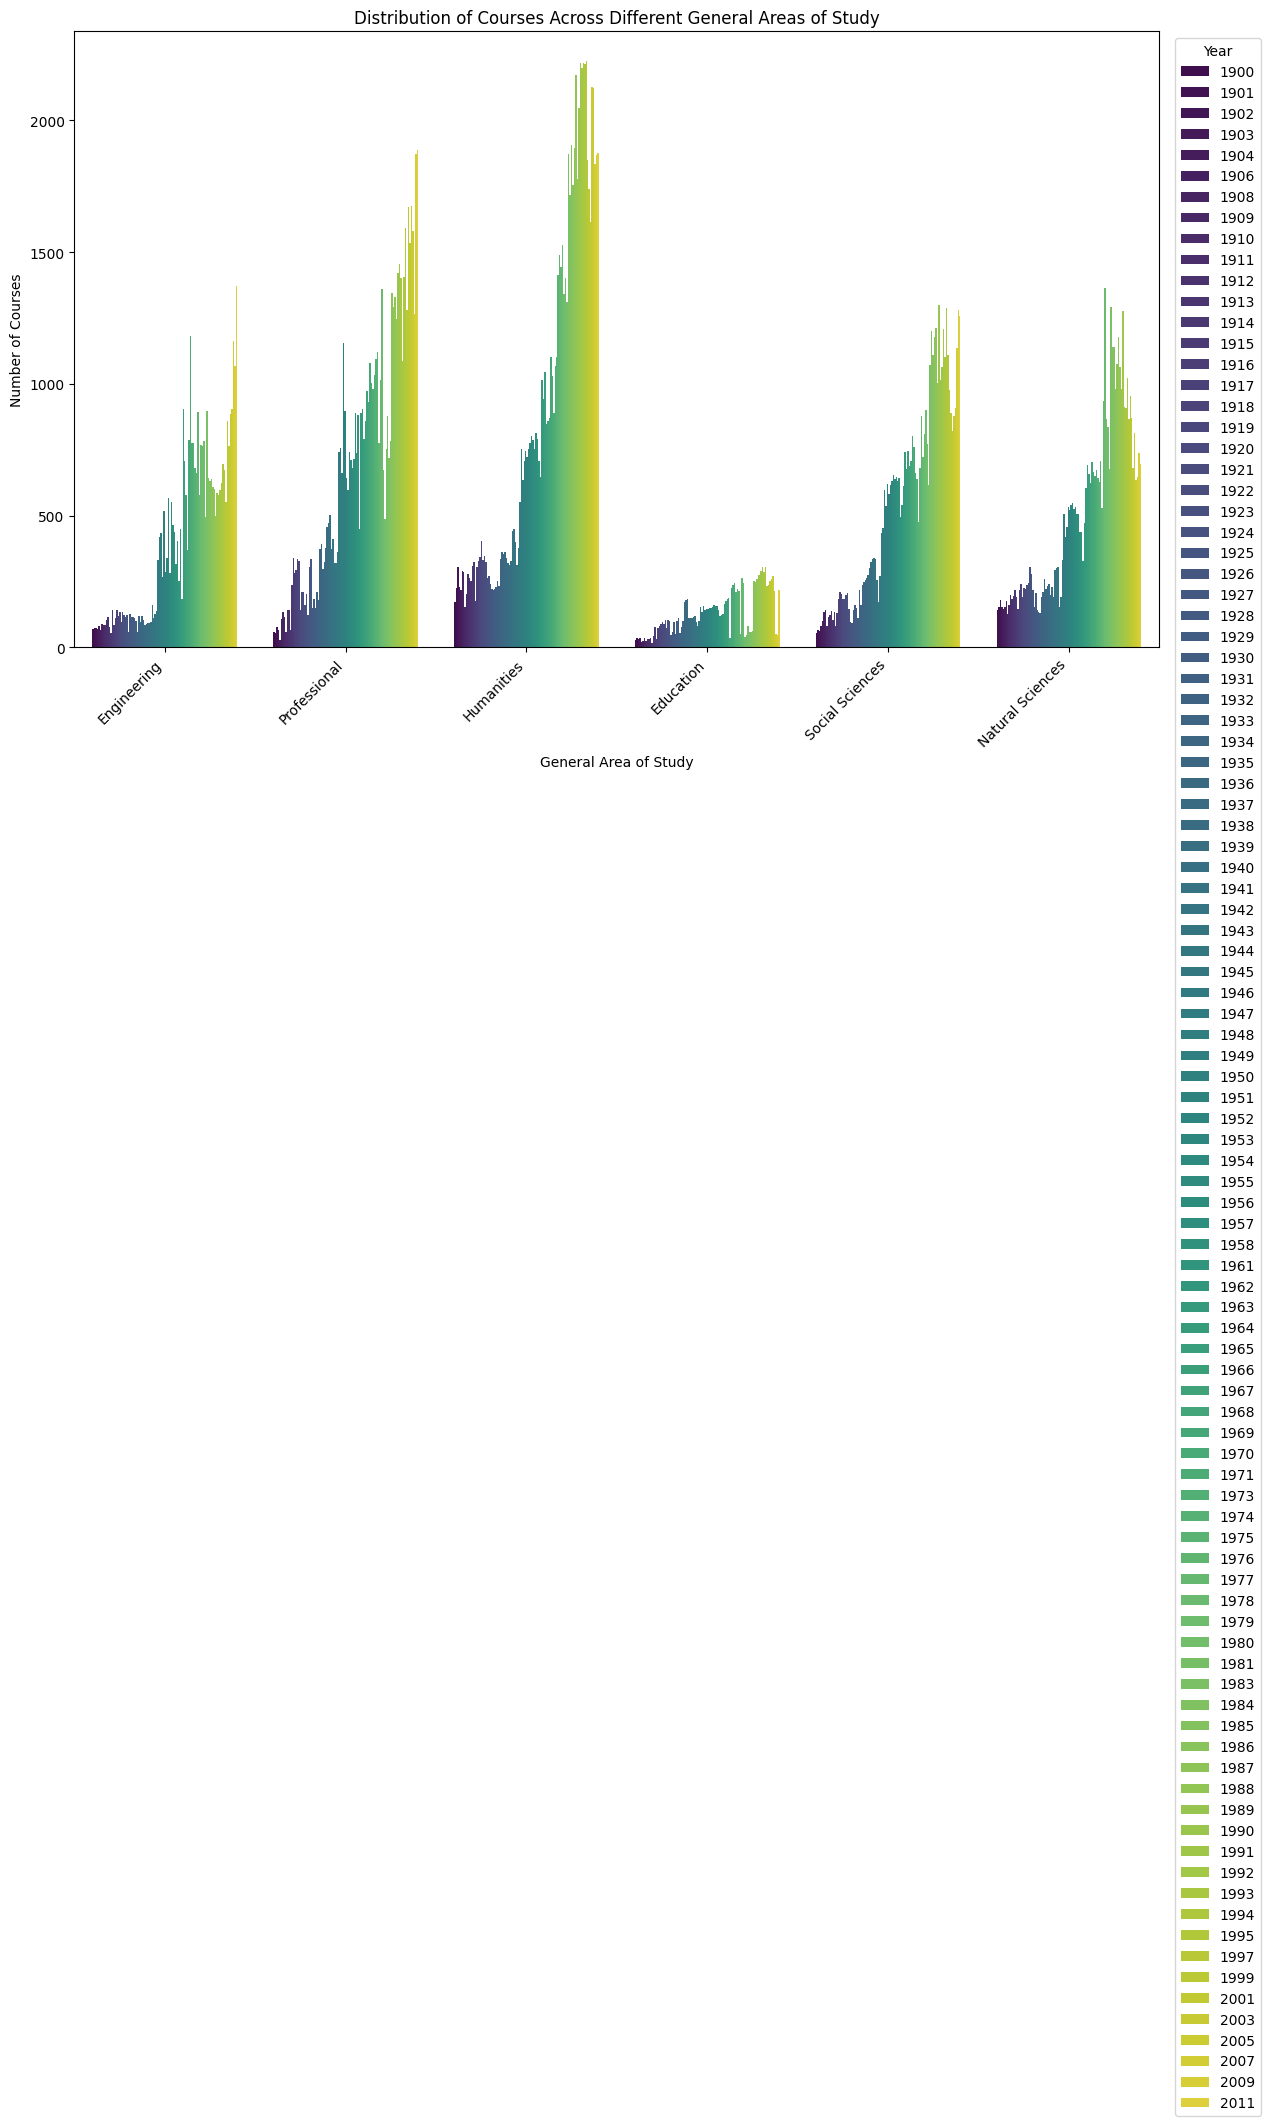

In [8]:
# Plot the distribution of courses across different general areas of study
plt.figure(figsize=(14, 8))
sns.countplot(x='GenArea', data=df, hue='Year', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('General Area of Study')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses Across Different General Areas of Study')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.1,1))
plt.show()


**What is the distribution of courses based on the number of professors teaching them?**

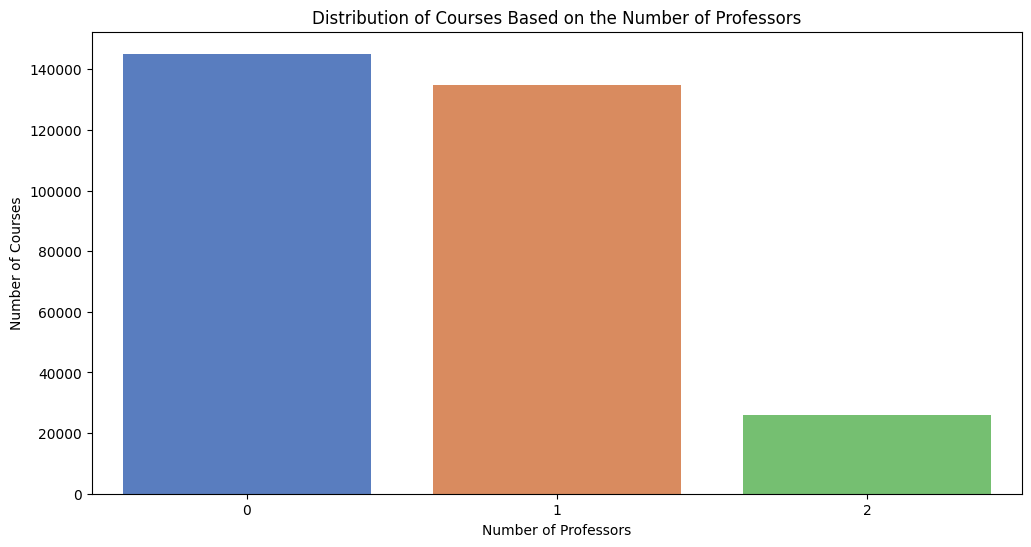

In [9]:
# Calculate the total number of professors for each course
df['TotalProfs'] = df[['Profs1', 'Profs2']].count(axis=1)

# Plot the distribution of courses based on the number of professors
plt.figure(figsize=(12, 6))
sns.countplot(x='TotalProfs', data=df, palette='muted')
plt.xlabel('Number of Professors')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses Based on the Number of Professors')
plt.show()


**How many courses are taught each term (Fall, Winter, Spring, Summer) within each academic area?**

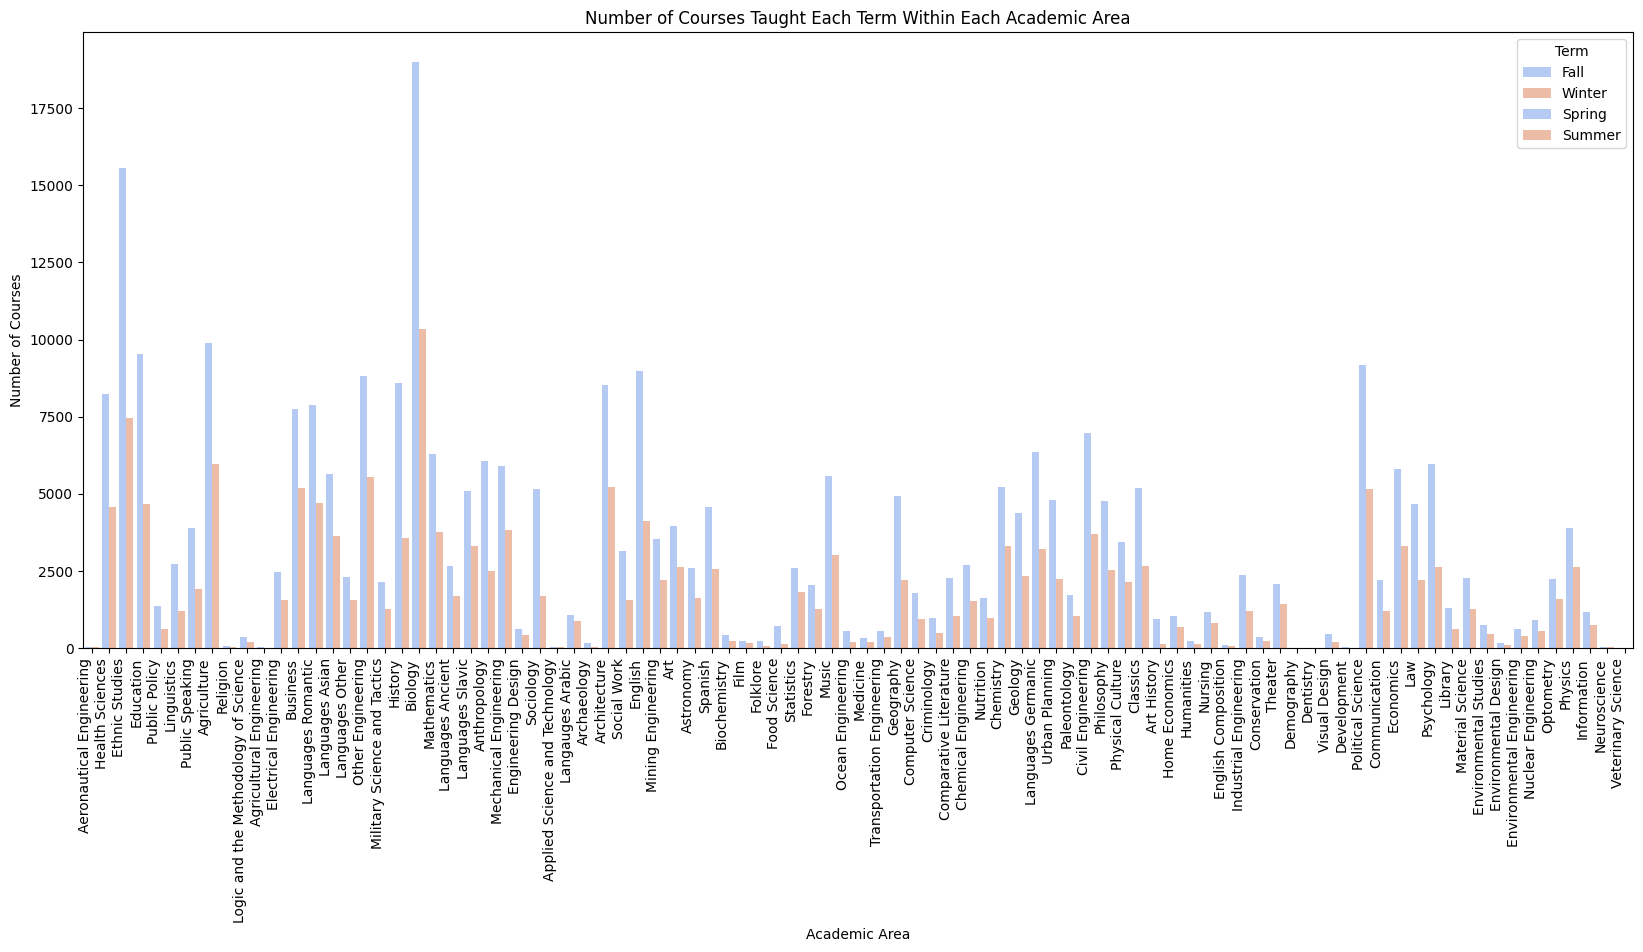

In [10]:
# Create a grouped bar plot for the number of courses taught each term within each academic area
plt.figure(figsize=(20, 8))
sns.countplot(x='Area', hue='Fall', data=df, palette='coolwarm', dodge=True)
sns.countplot(x='Area', hue='Winter', data=df, palette='coolwarm', dodge=True)
sns.countplot(x='Area', hue='Spring', data=df, palette='coolwarm', dodge=True)
sns.countplot(x='Area', hue='Summer', data=df, palette='coolwarm', dodge=True)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Academic Area')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Taught Each Term Within Each Academic Area')
plt.legend(title='Term', loc='upper right', labels=['Fall', 'Winter', 'Spring', 'Summer'])
plt.show()


**What is the distribution of courses based on the length of their descriptions?**

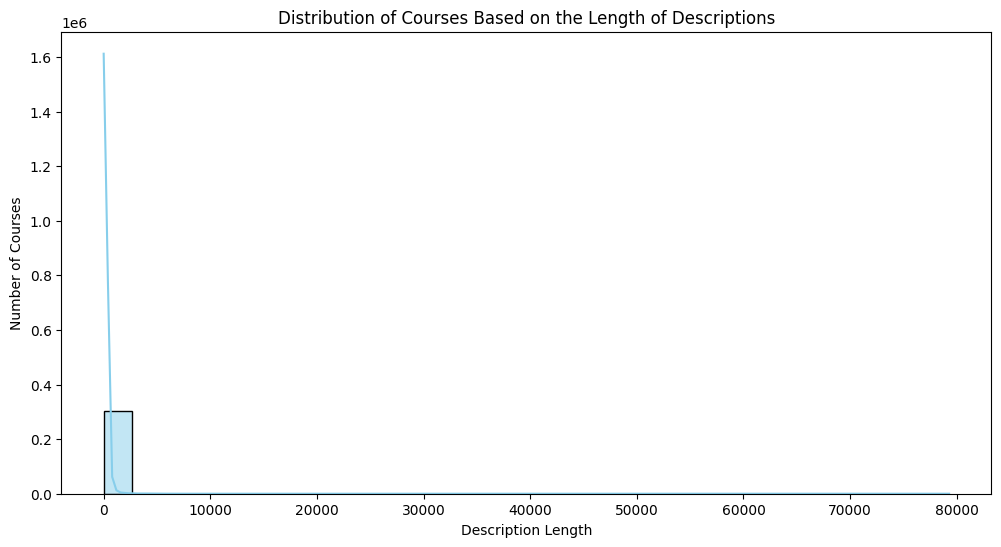

In [11]:
# Calculate the length of course descriptions
df['DescriptionLength'] = df['Description'].apply(lambda x: len(str(x)))

# Plot the distribution of courses based on the length of descriptions
plt.figure(figsize=(12, 6))
sns.histplot(df['DescriptionLength'], bins=30, kde=True, color='skyblue')
plt.xlabel('Description Length')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses Based on the Length of Descriptions')
plt.show()


**How do the course enrollment numbers vary across different fields of study for each term (Fall, Winter, Spring, Summer)?**

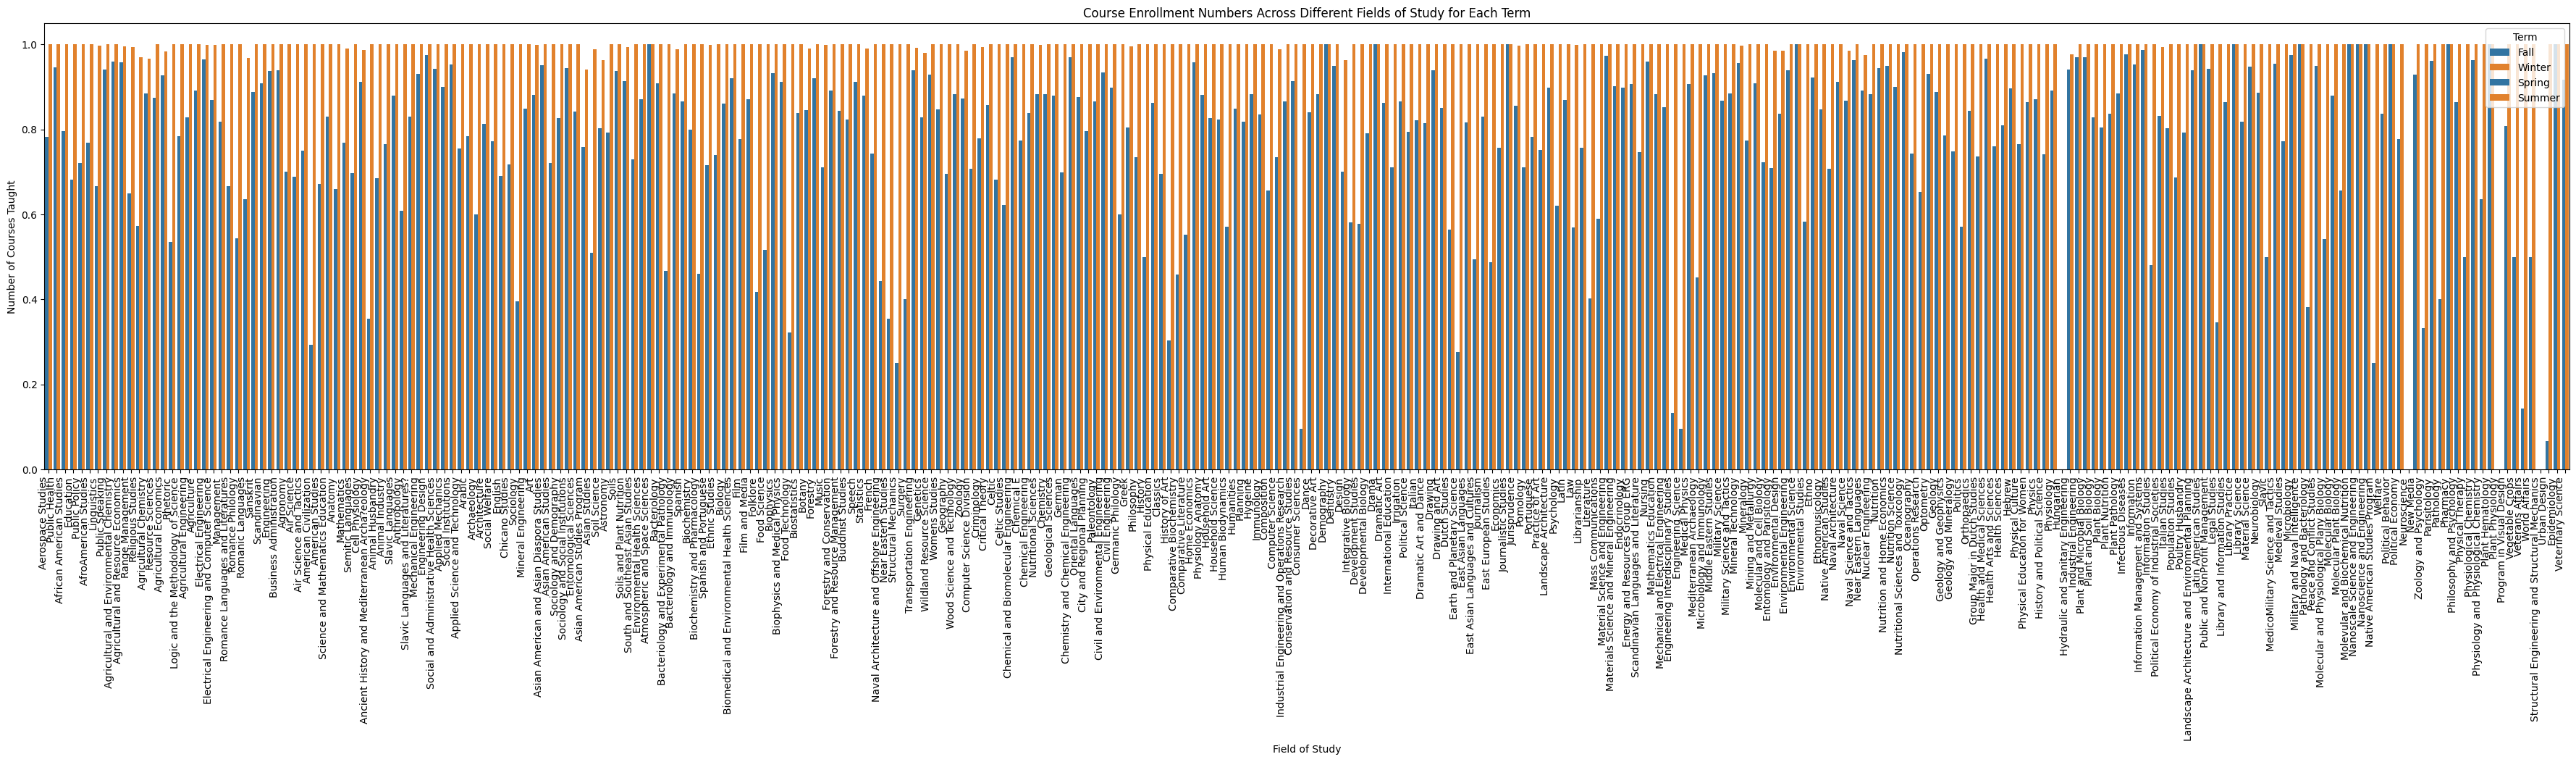

In [12]:
# Create a bar plot for course enrollment numbers across different fields of study for each term
plt.figure(figsize=(45, 8))
sns.barplot(x='Field', y='Taught', hue='Fall', data=df, errorbar=None)
sns.barplot(x='Field', y='Taught', hue='Winter', data=df, errorbar=None)
sns.barplot(x='Field', y='Taught', hue='Spring', data=df, errorbar=None)
sns.barplot(x='Field', y='Taught', hue='Summer', data=df, errorbar=None)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Field of Study')
plt.ylabel('Number of Courses Taught')
plt.title('Course Enrollment Numbers Across Different Fields of Study for Each Term')
plt.legend(title='Term', loc='upper right', labels=['Fall', 'Winter', 'Spring', 'Summer'])
plt.show()


**How does the average course enrollment vary across different general areas of study for each term (Fall, Winter, Spring, Summer)?**

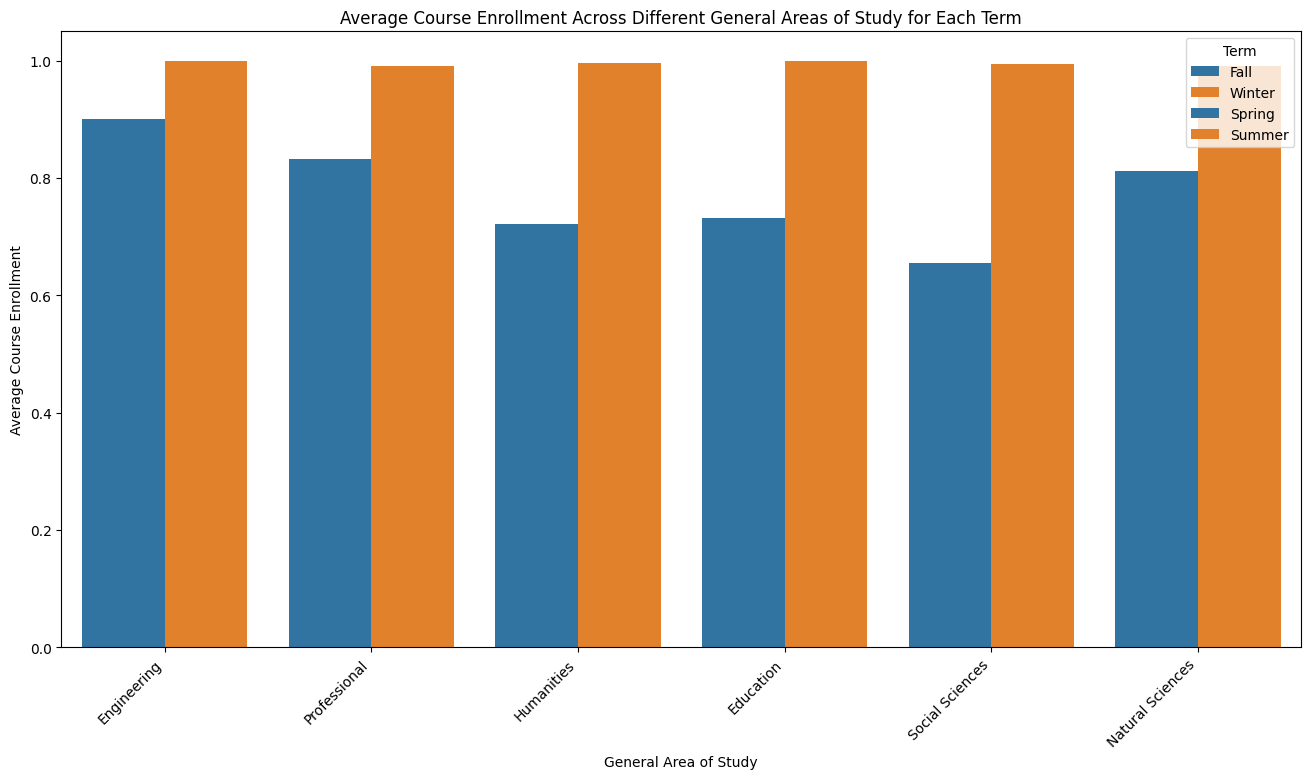

In [13]:
# Create a bar plot for average course enrollment across different general areas of study for each term
plt.figure(figsize=(16, 8))
sns.barplot(x='GenArea', y='Taught', hue='Fall', data=df, errorbar=None)
sns.barplot(x='GenArea', y='Taught', hue='Winter', data=df, errorbar=None)
sns.barplot(x='GenArea', y='Taught', hue='Spring', data=df, errorbar=None)
sns.barplot(x='GenArea', y='Taught', hue='Summer', data=df, errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel('General Area of Study')
plt.ylabel('Average Course Enrollment')
plt.title('Average Course Enrollment Across Different General Areas of Study for Each Term')
plt.legend(title='Term', loc='upper right', labels=['Fall', 'Winter', 'Spring', 'Summer'])
plt.show()


**How many courses are taught in each academic area for each season (Fall, Winter, Spring, Summer)?**

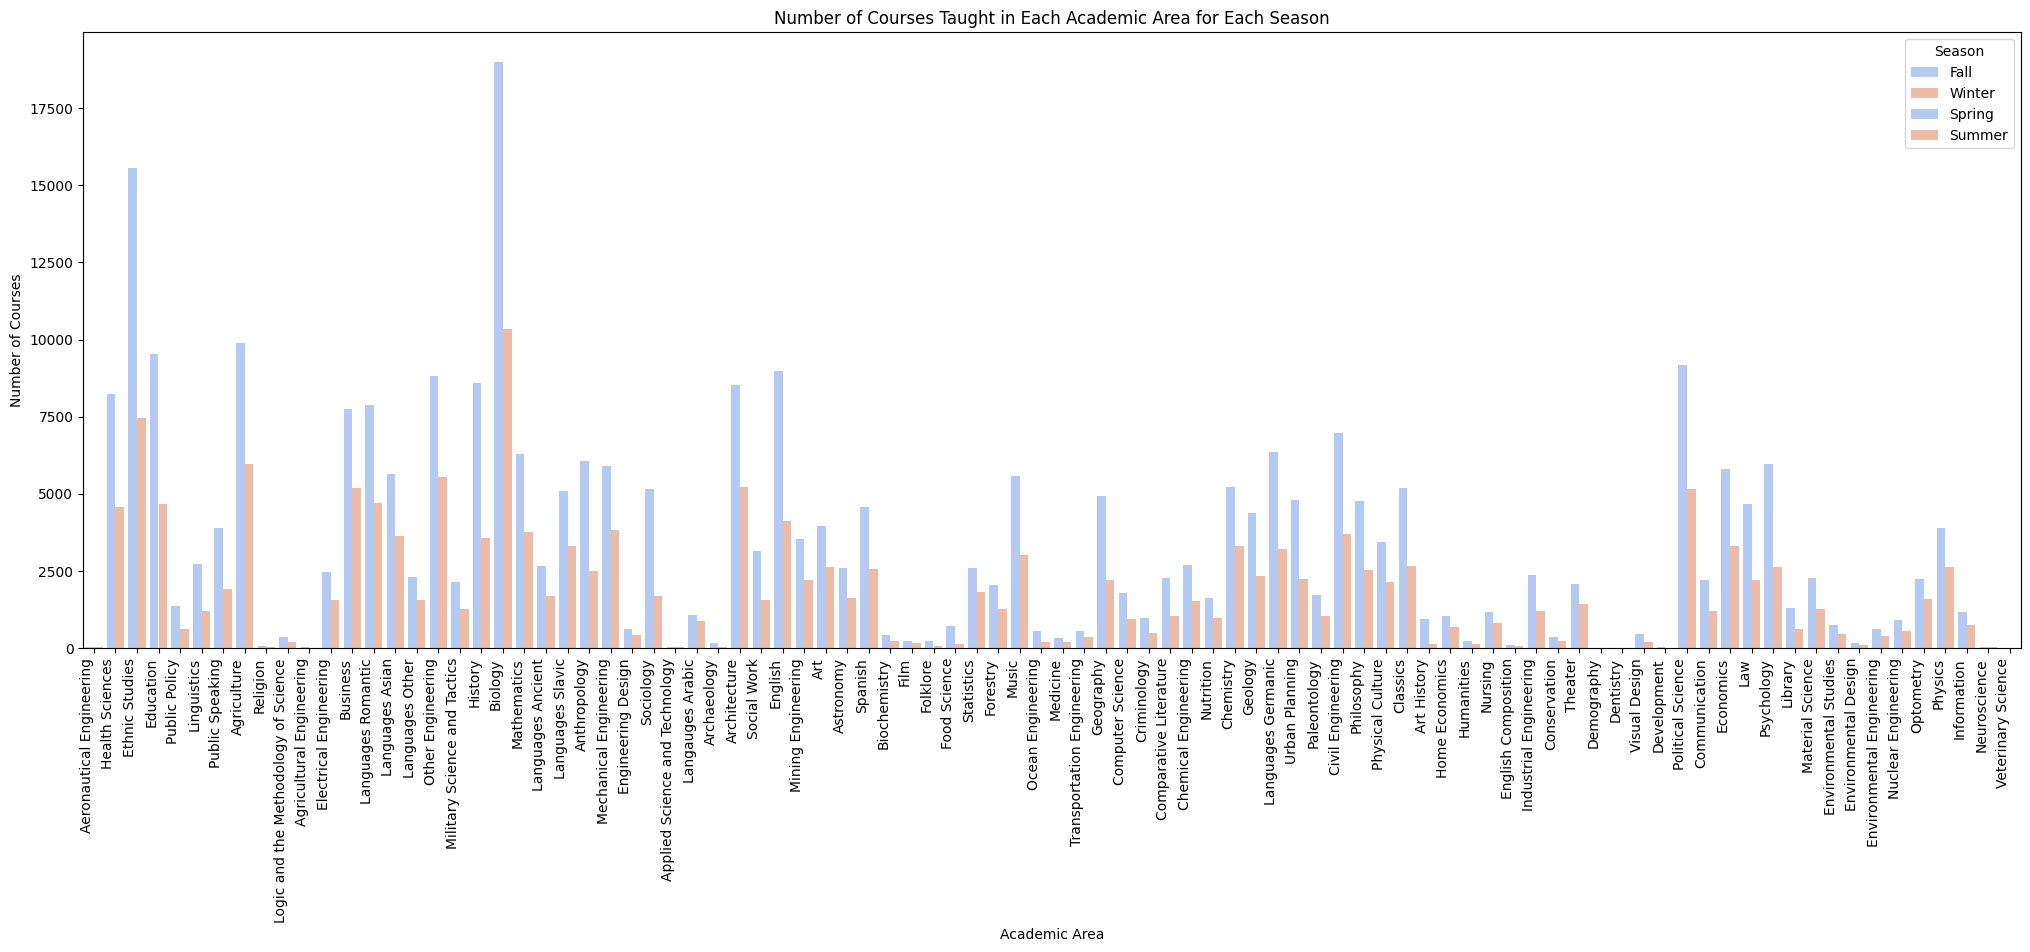

In [14]:
# Create a grouped bar plot for the number of courses taught in each academic area for each season
plt.figure(figsize=(25, 8))
sns.countplot(x='Area', hue='Fall', data=df, palette='coolwarm', dodge=True)
sns.countplot(x='Area', hue='Winter', data=df, palette='coolwarm', dodge=True)
sns.countplot(x='Area', hue='Spring', data=df, palette='coolwarm', dodge=True)
sns.countplot(x='Area', hue='Summer', data=df, palette='coolwarm', dodge=True)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Academic Area')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Taught in Each Academic Area for Each Season')
plt.legend(title='Season', loc='upper right', labels=['Fall', 'Winter', 'Spring', 'Summer'])
plt.show()


**What is the relationship between course enrollment and the length of course descriptions?**

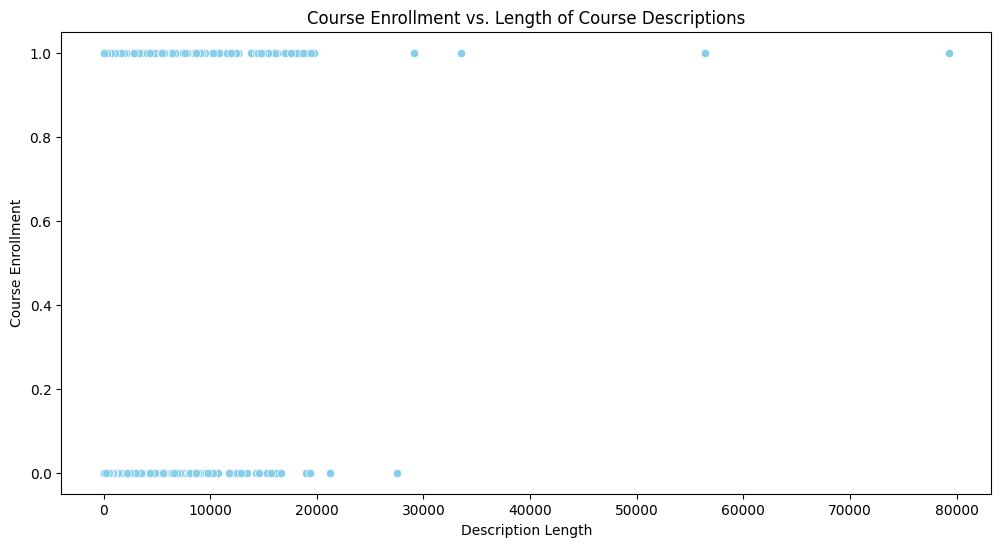

In [15]:
# Create a scatter plot for course enrollment vs. length of course descriptions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DescriptionLength', y='Taught', data=df, color='skyblue')
plt.xlabel('Description Length')
plt.ylabel('Course Enrollment')
plt.title('Course Enrollment vs. Length of Course Descriptions')
plt.show()


**How does the number of professors relate to course enrollment within each academic area?**

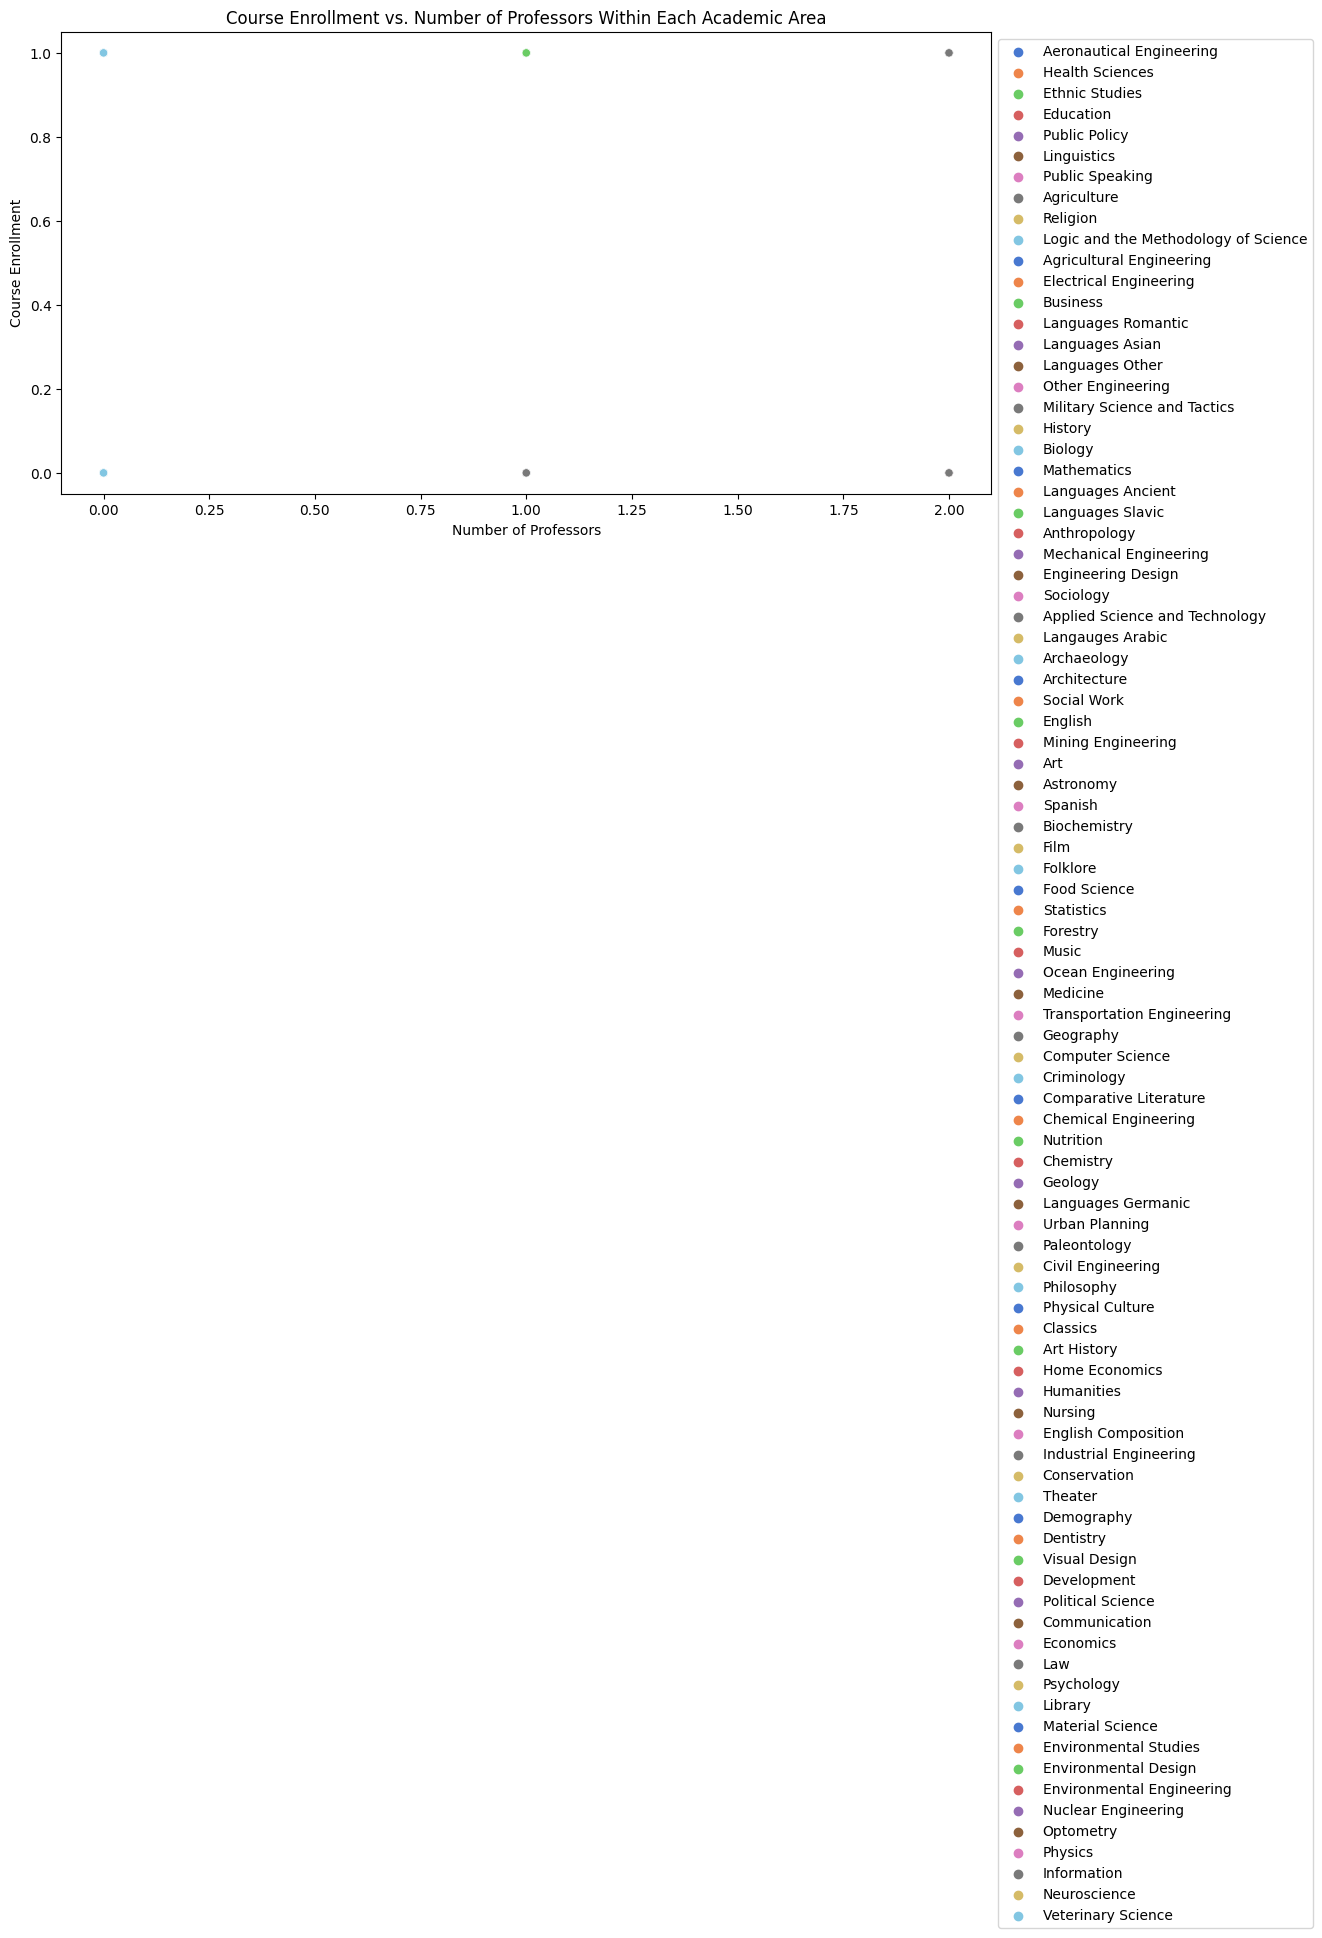

In [16]:
# Create a scatter plot for course enrollment vs. the number of professors within each academic area
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalProfs', y='Taught', hue='Area', data=df, palette='muted')
plt.xlabel('Number of Professors')
plt.ylabel('Course Enrollment')
plt.title('Course Enrollment vs. Number of Professors Within Each Academic Area')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


**What is the relationship between course enrollment and the number of professors teaching a course?**

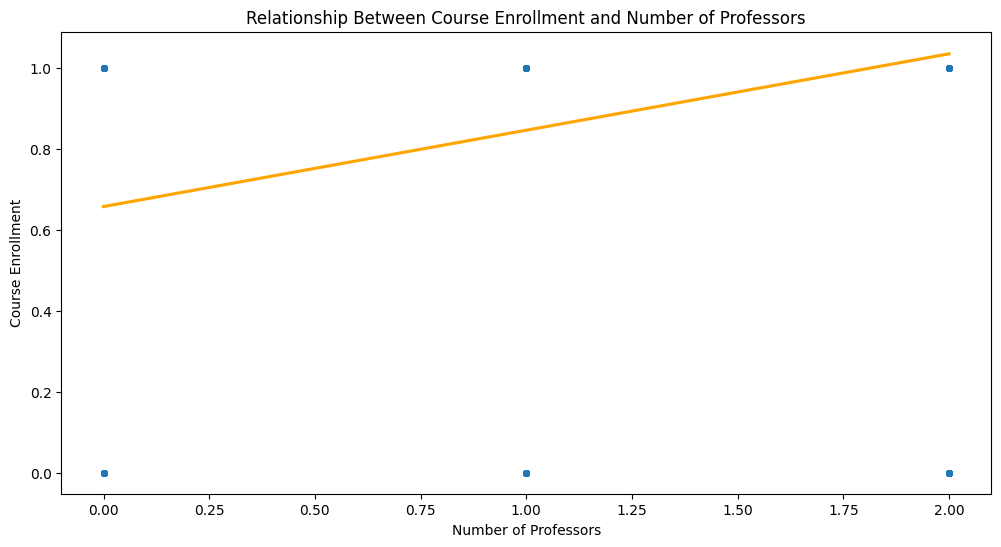

In [17]:
# Create a scatter plot for course enrollment vs. the number of professors with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='TotalProfs', y='Taught', data=df, scatter_kws={'s': 15}, line_kws={'color': 'orange'})
plt.xlabel('Number of Professors')
plt.ylabel('Course Enrollment')
plt.title('Relationship Between Course Enrollment and Number of Professors')
plt.show()


**What is the relationship between course enrollment and the length of course descriptions, with a separate scatter plot for each academic area?**

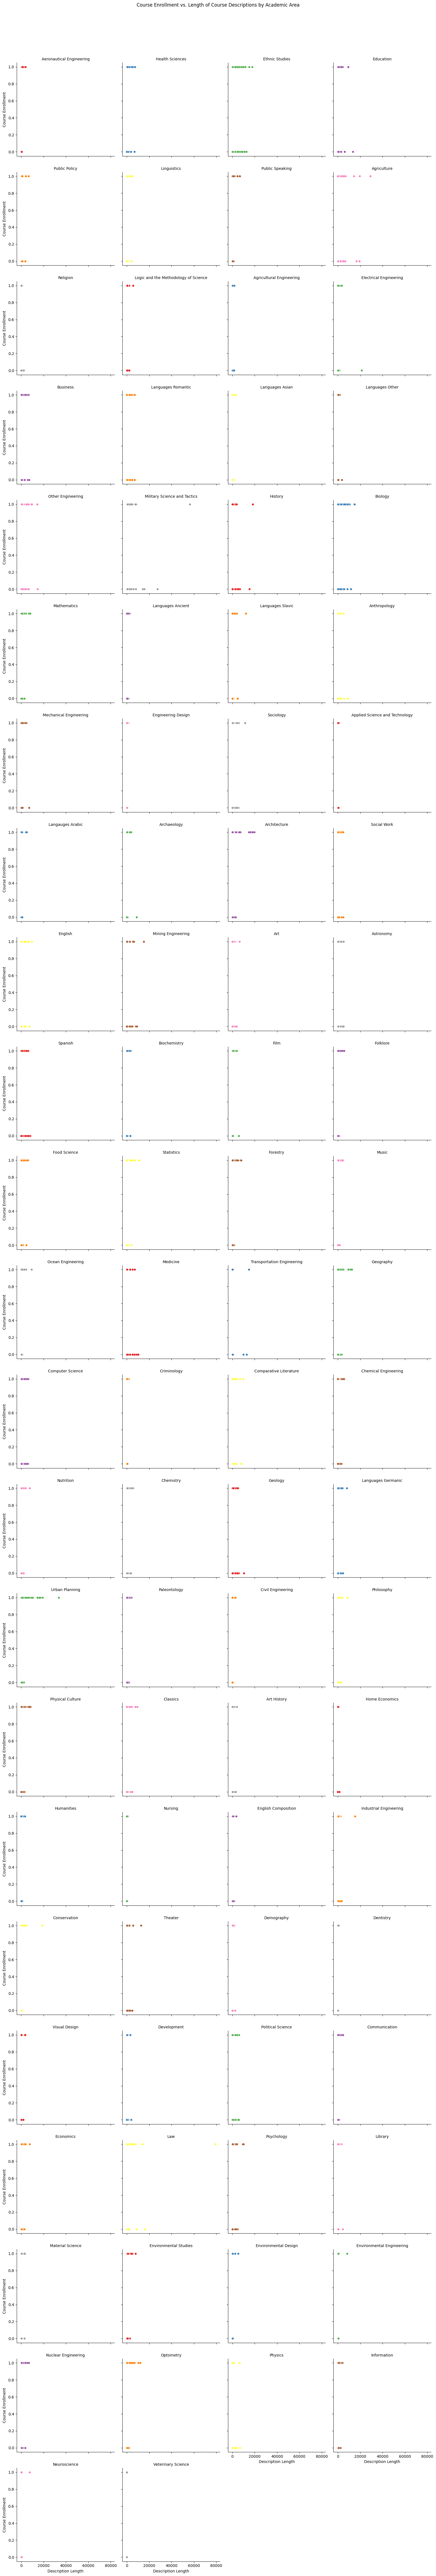

In [18]:
# Create scatter plots for course enrollment vs. length of course descriptions, with separate plots for each academic area
g = sns.FacetGrid(df, col='Area', col_wrap=4, height=4, hue='Area', palette='Set1')
g.map(sns.scatterplot, 'DescriptionLength', 'Taught', s=30)
g.set_axis_labels('Description Length', 'Course Enrollment')
g.set_titles(col_template="{col_name}")
plt.suptitle('Course Enrollment vs. Length of Course Descriptions by Academic Area', y=1.02)
plt.show()


**How does the course enrollment relate to the number of professors teaching a course, considering different general areas of study?**

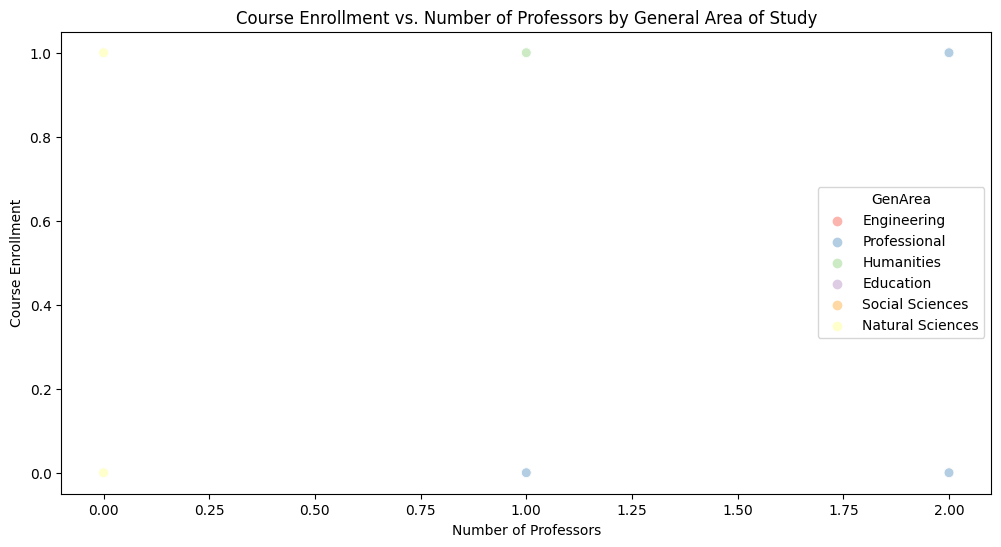

In [19]:
# Create a scatter plot for course enrollment vs. the number of professors with different colors for each general area of study
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalProfs', y='Taught', hue='GenArea', data=df, palette='Pastel1', s=50)
plt.xlabel('Number of Professors')
plt.ylabel('Course Enrollment')
plt.title('Course Enrollment vs. Number of Professors by General Area of Study')
plt.show()


**What is the distribution of courses across different seasons (Fall, Winter, Spring, Summer) in terms of the total number of courses taught?**

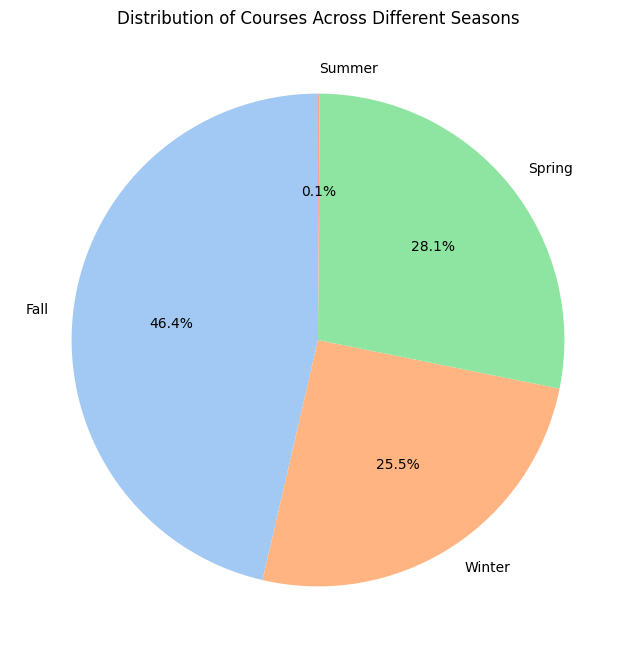

In [20]:
# Create a pie chart to show the distribution of courses across different seasons
season_counts_total = df[['Fall', 'Winter', 'Spring', 'Summer']].sum()
plt.figure(figsize=(8, 8))
plt.pie(season_counts_total, labels=season_counts_total.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Courses Across Different Seasons')
plt.show()


**What is the proportion of courses taught in each general area of study based on the total number of courses?**

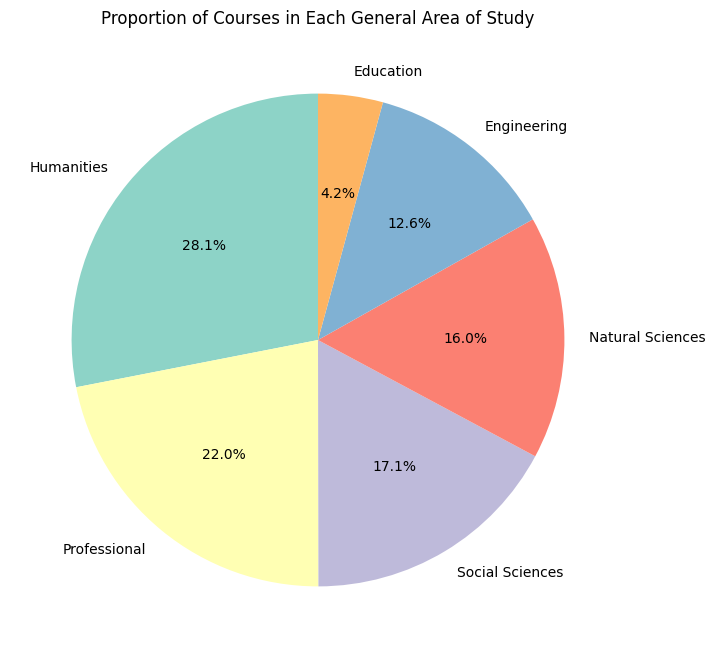

In [21]:
# Create a pie chart to show the proportion of courses in each general area of study
genarea_counts_total = df['GenArea'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genarea_counts_total, labels=genarea_counts_total.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Proportion of Courses in Each General Area of Study')
plt.show()


**What is the distribution of courses across different academic areas based on the total number of courses?**

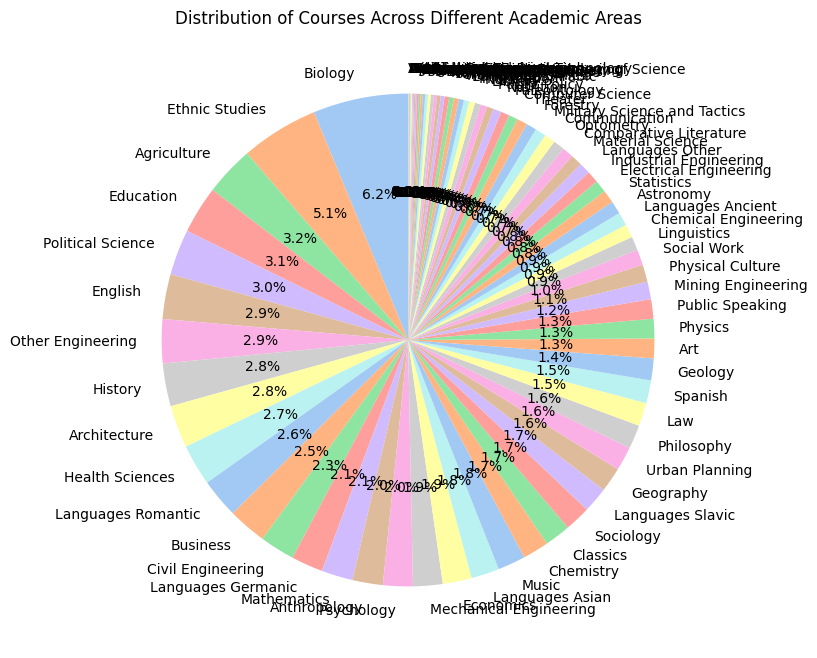

In [22]:
# Create a pie chart to show the distribution of courses across different academic areas
area_counts_total = df['Area'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(area_counts_total, labels=area_counts_total.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Courses Across Different Academic Areas')
plt.show()


**How does the distribution of courses vary across different fields of study based on the total number of courses?**

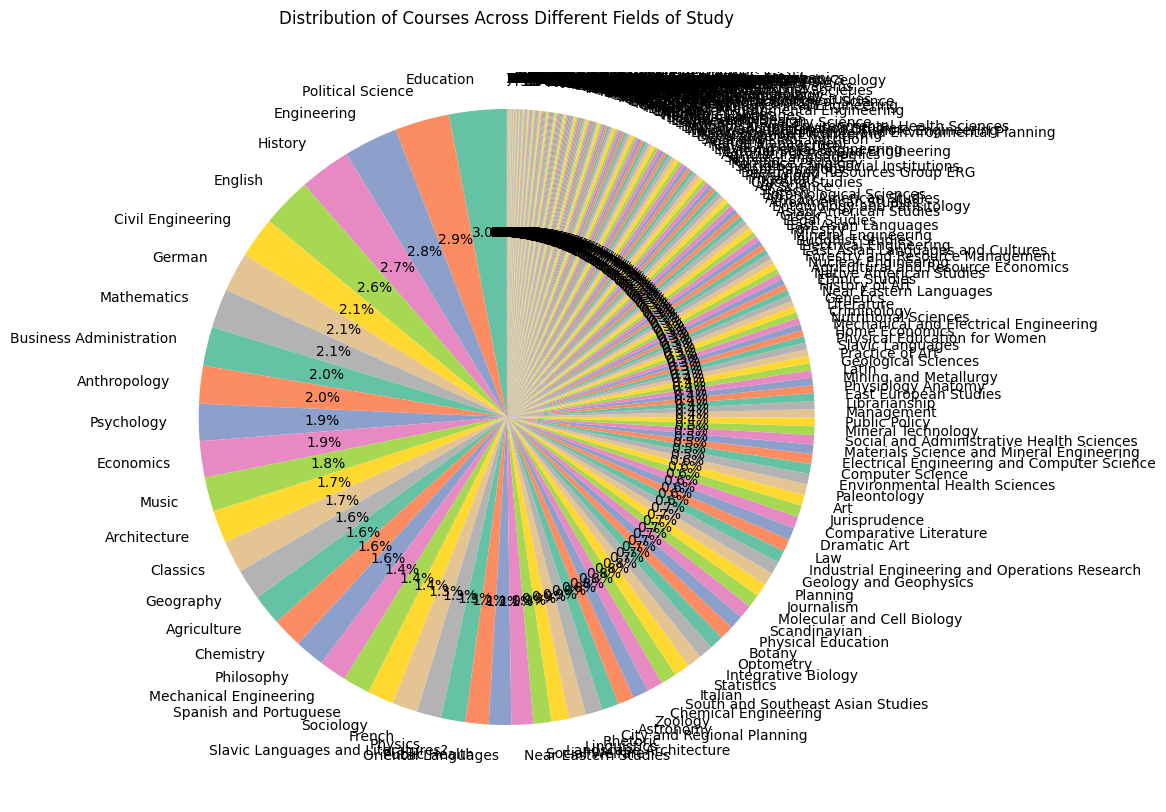

In [23]:
# Create a pie chart to show the distribution of courses across different fields of study
field_counts_total = df['Field'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(field_counts_total, labels=field_counts_total.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of Courses Across Different Fields of Study')
plt.show()
